In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from graphviz import Source
from sklearn.preprocessing import LabelEncoder

In [30]:
dataframe = pd.read_csv('../../Datasets/apples_and_oranges.csv')
dataframe.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [31]:
dataframe.isna().sum()

Weight    0
Size      0
Class     0
dtype: int64

In [32]:
print(dataframe['Class'].dtype)

object


In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('Class',axis=1),dataframe['Class'],test_size=0.2,random_state=42)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)


X_train:  (32, 2)
X_test:  (8, 2)
y_train:  (32,)
y_test:  (8,)


In [34]:
le = LabelEncoder()
le.fit(y_train)
le.classes_

array(['apple', 'orange'], dtype=object)

In [35]:
le.transform(y_train)

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [36]:
le.transform(y_test)

array([0, 1, 1, 1, 1, 0, 0, 1])

In [37]:
dt_clf = DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
print(y_pred)

['apple' 'orange' 'orange' 'orange' 'orange' 'apple' 'apple' 'orange']


In [38]:
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
print(f'Accuracy: {acc*100}')

Accuracy: 100.0


In [39]:
feature_names = list(dataframe.drop('Class',axis=1).columns)
class_names = ['apple','orange']
with open('../Images/clf_tree.dot','w') as f:
    export_graphviz(
        dt_clf,
        out_file= f,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,filled=True
    )

dot_path = '../Images/clf_tree.dot'
output = Source.from_file(dot_path,format='png')
output.view()

'..\\Images\\clf_tree.dot.png'

In [40]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)

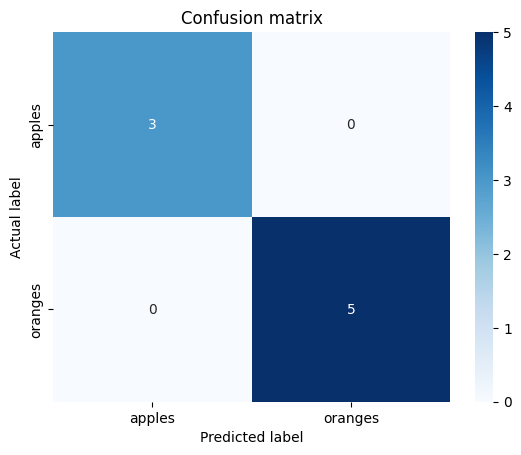

In [41]:
def plot_cm(cm):
    cm_plot_labels = ['apples','oranges']
    confusion_matrix(y_true=y_test,y_pred=y_pred)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=cm_plot_labels,yticklabels=cm_plot_labels)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion matrix')
    plt.show()


plot_cm(cm)